In [6]:
import numpy as np 
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        continue
        print(os.path.join(dirname, filename))
        
        
path_root = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"

In [7]:
for i, animal in enumerate(os.listdir(path_root)):
    print(f'{animal:15s}', len(os.listdir(path_root + '/' + animal)), end='\t\t')
    
    if (i+1) % 5 == 0:
        print(' ')

beetle          60		parrot          60		fox             60		wolf            60		hedgehog        60		 
turtle          60		snake           60		shark           60		horse           60		antelope        60		 
hamster         60		woodpecker      60		eagle           60		chimpanzee      60		bison           60		 
penguin         60		butterfly       60		sandpiper       60		hornbill        60		lion            60		 
lobster         60		oyster          60		otter           60		grasshopper     60		raccoon         60		 
dog             60		pigeon          60		donkey          60		hippopotamus    60		hummingbird     60		 
bear            60		coyote          60		bee             60		pig             60		rat             60		 
owl             60		caterpillar     60		koala           60		squid           60		hare            60		 
whale           60		mouse           60		tiger           60		fly             60		lizard          60		 
orangutan       60		bat             60		porcupine       60		kangaroo        60		go

In [8]:
for i, animal in enumerate(os.listdir(path_root)):
    print(f'[{i+1:2d}] {animal:15s}', end='\t')
    
    if (i+1) % 5 == 0:
        print(' ')

[ 1] beetle         	[ 2] parrot         	[ 3] fox            	[ 4] wolf           	[ 5] hedgehog       	 
[ 6] turtle         	[ 7] snake          	[ 8] shark          	[ 9] horse          	[10] antelope       	 
[11] hamster        	[12] woodpecker     	[13] eagle          	[14] chimpanzee     	[15] bison          	 
[16] penguin        	[17] butterfly      	[18] sandpiper      	[19] hornbill       	[20] lion           	 
[21] lobster        	[22] oyster         	[23] otter          	[24] grasshopper    	[25] raccoon        	 
[26] dog            	[27] pigeon         	[28] donkey         	[29] hippopotamus   	[30] hummingbird    	 
[31] bear           	[32] coyote         	[33] bee            	[34] pig            	[35] rat            	 
[36] owl            	[37] caterpillar    	[38] koala          	[39] squid          	[40] hare           	 
[41] whale          	[42] mouse          	[43] tiger          	[44] fly            	[45] lizard         	 
[46] orangutan      	[47] bat        

In [9]:
from skimage.transform import resize
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from random import randint
import torch

def loadImg(pathImg):
    img = imread(pathImg)
    
    if img.max() > 1.1:
        img = img / 255.0
    
    return img

def imshow(img, size=None):
    def plotar(imagem, cmap=None):
        if size is None:
            plt.imshow(imagem)
            plt.show()
            return
        
        plt.figure(figsize=size)
        plt.imshow(imagem, cmap=cmap)
        plt.show()
        
    if img.max() > 1.0:
        img = img / 255.0

    if type(img) == np.ndarray:
        if len(img.shape) == 3:
            plotar(img)
        else:
            plotar(img, cmap='gray')
    else:
        with torch.no_grad():
            img = img.clone()
            img = img.to("cpu")

            if img.min() < 0.0: # "des"normalizar
                img = img / 2 + 0.5 # img * std + med,

            npimg = img.detach().numpy()
            if len(npimg.shape) == 3:
                plotar(np.transpose(npimg, (1, 2, 0)))
            else:
                plotar(npimg, cmap='gray')

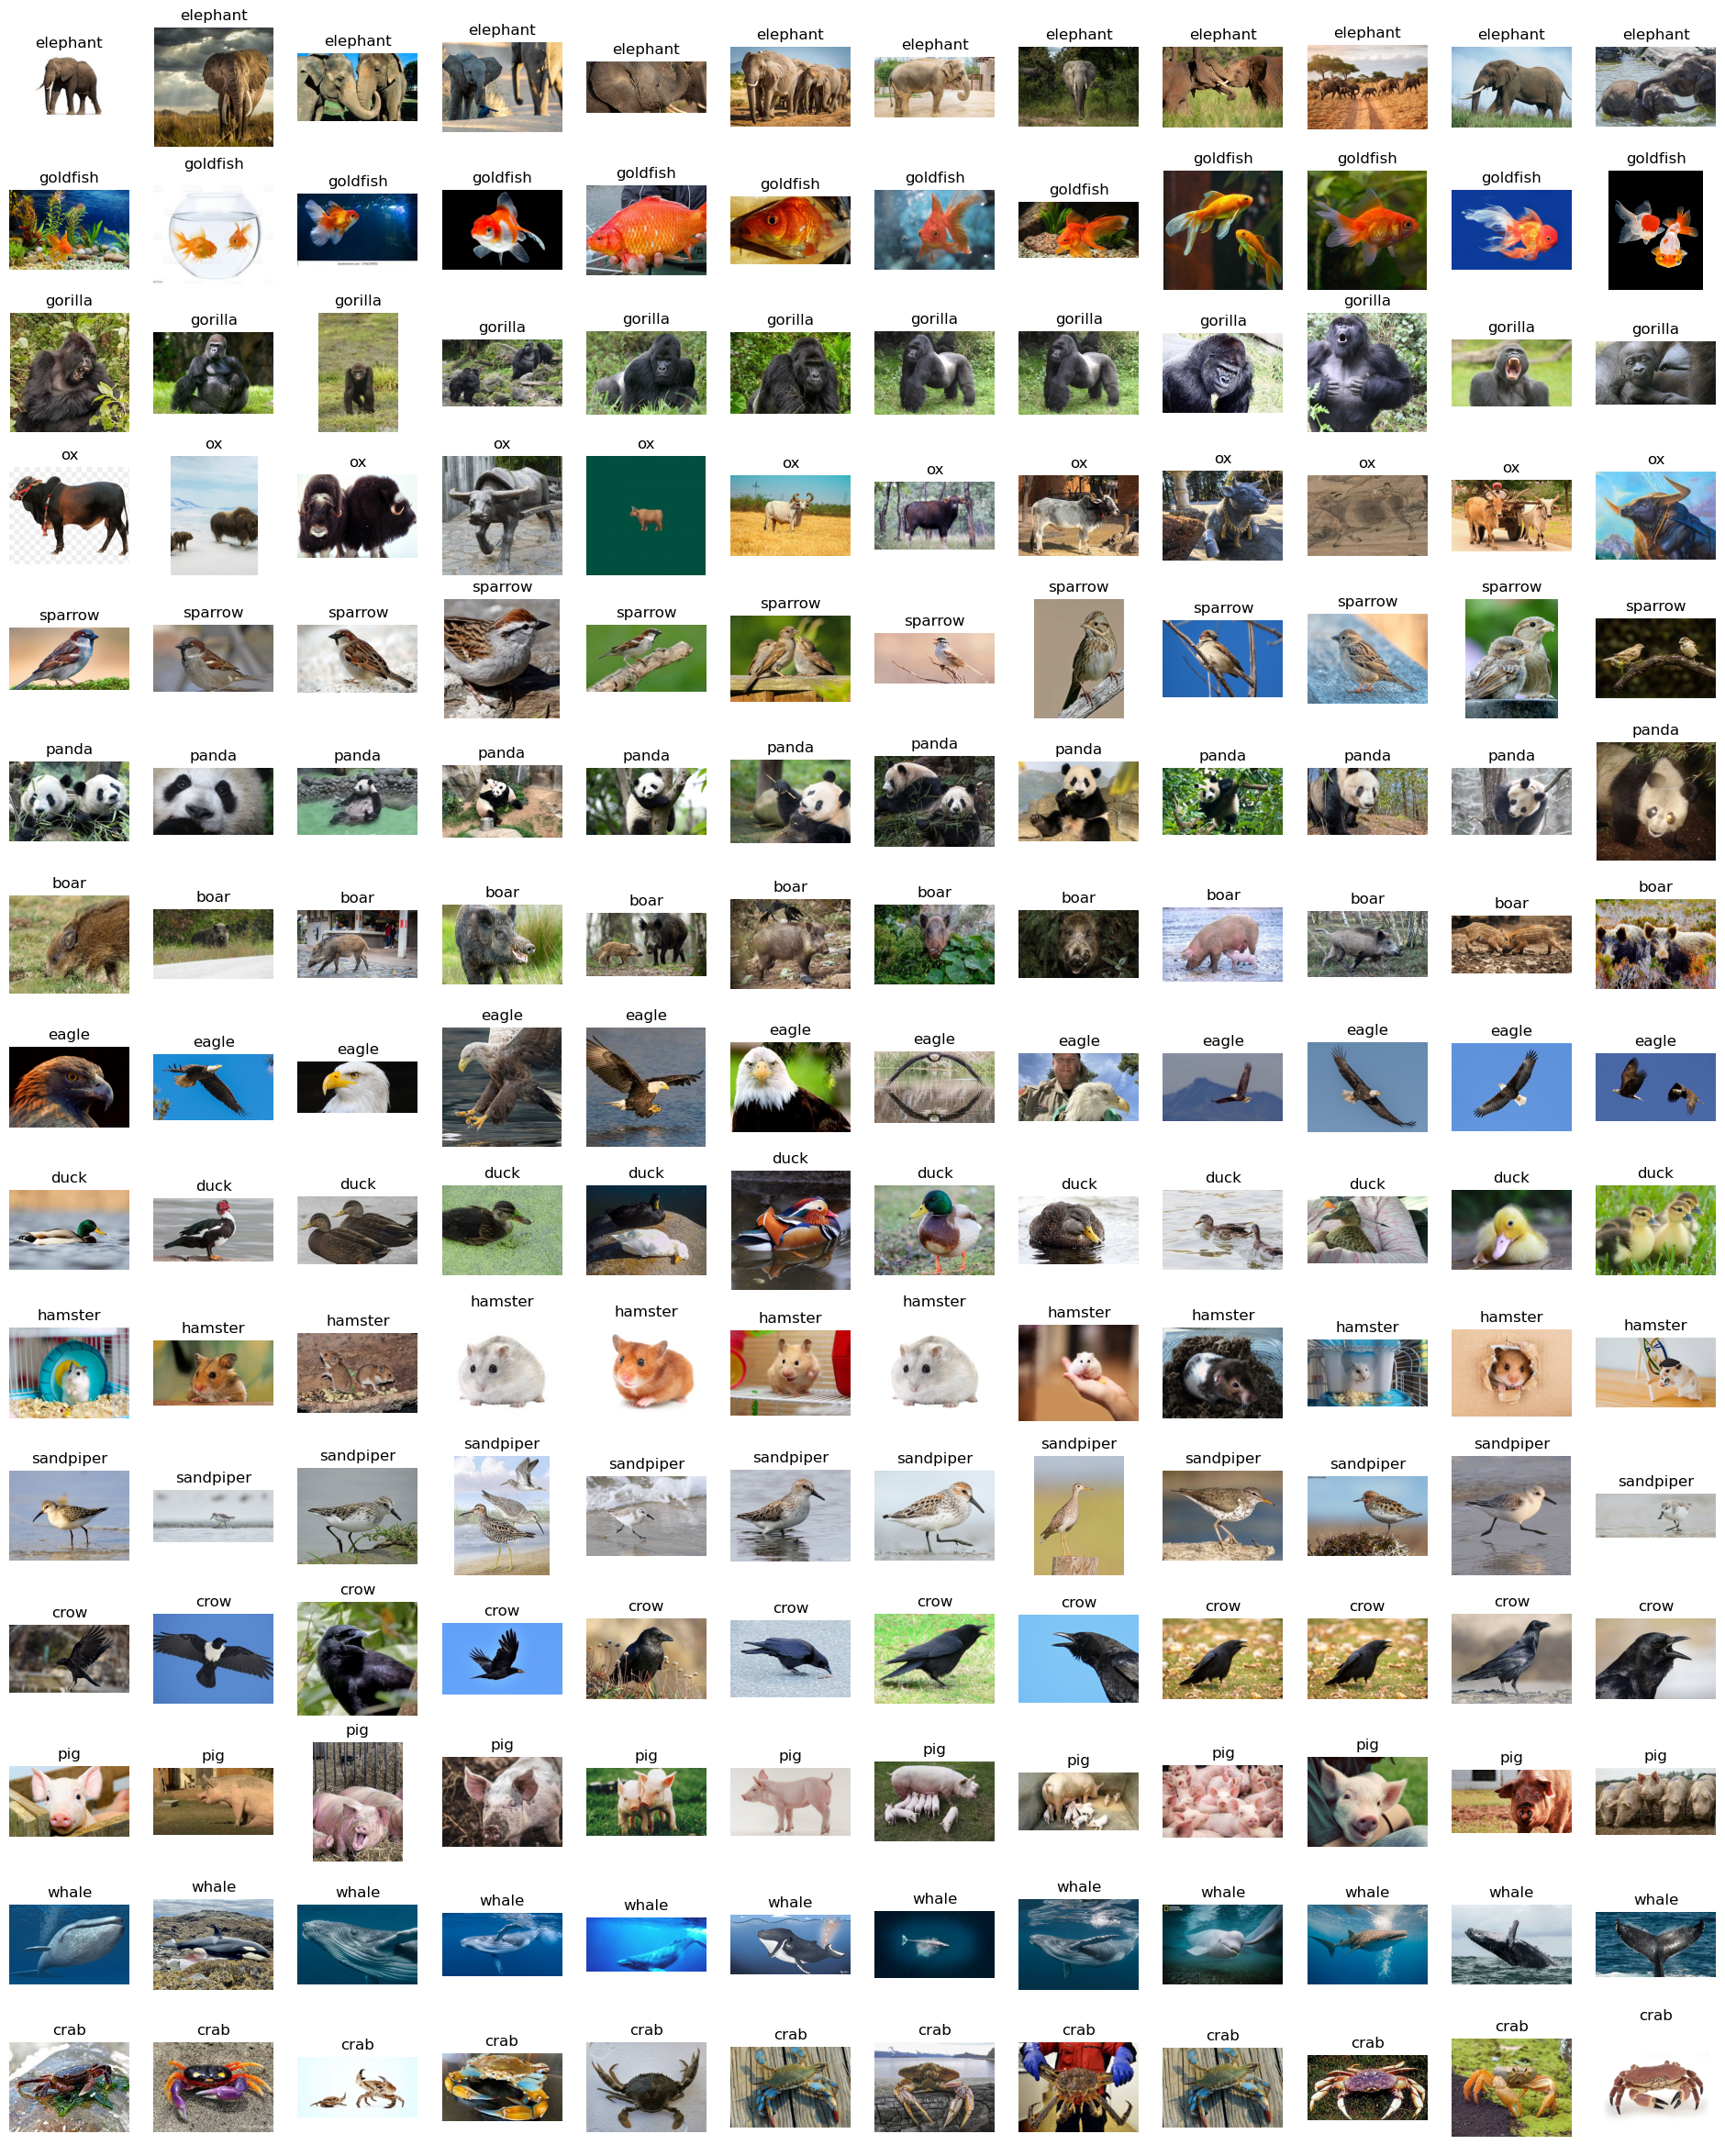

In [10]:
import random

linhas = 15 #altura
colunas = 12 #largura

imgs = random.sample(os.listdir(path_root), k = linhas)

fig, axs = plt.subplots(linhas, colunas, figsize=(colunas * 2, linhas * 2)) #colunas = x, linhas = y

for lin, label in enumerate(imgs):
    lista = os.listdir(os.path.join(path_root, label))
    lista = random.sample(lista, k = colunas)
    
    for col, imgname in enumerate(lista):
        img = loadImg(os.path.join(path_root, label, imgname))
 
        ax = axs[lin, col]
        
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')
        
plt.show()

In [11]:
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import torch

#quando for utilizado no treinamento
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((299, 299)),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transformView = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((299, 299)),
])

In [12]:
labels = sorted(os.listdir(path_root))
labels[0]

'antelope'

In [13]:
data_train = {}
data_test = {}

In [14]:
for label in labels:
    lista = os.listdir(os.path.join(path_root, label))

    teste = random.sample(list(range(len(lista))), k = 10) # 10 imagens de teste e 50 imagens de treinamento
    teste = sorted(teste, reverse=True)
    
    data_train[label] = []
    data_test[label] = []

    while teste:
        data_test[label].append(lista.pop(teste.pop(0)))

    for imgname in lista:
        data_train[label].append(imgname)

In [15]:
print(data_train.keys())

dict_keys(['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra'])


In [16]:
print(len(data_train['antelope']))
print(len(data_test['antelope']))

50
10


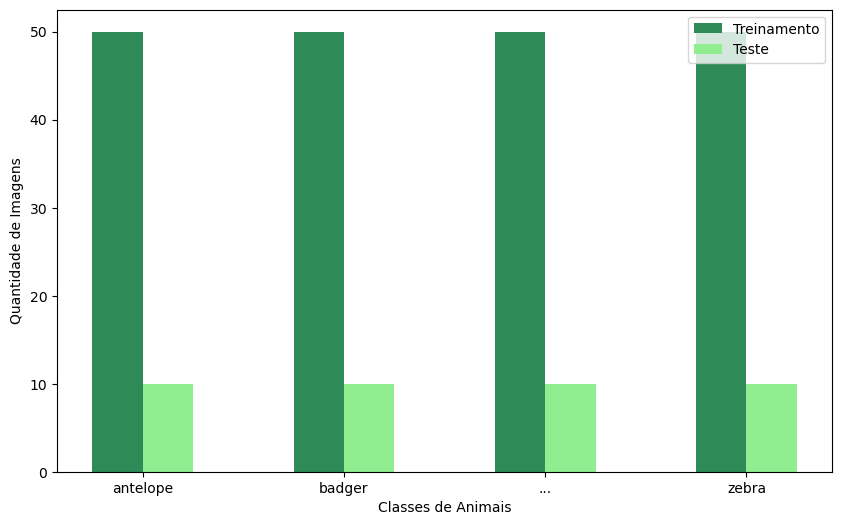

In [17]:
g_labels = list(data_train.keys())[:2]
g_labels.append('...')
g_labels.append(list(data_train.keys())[-1])

n_train = [len(data_train[gl]) if gl != '...' else len(data_train['whale']) for gl in g_labels]
n_test = [len(data_test[gl]) if gl != '...' else len(data_test['whale']) for gl in g_labels]

bar_width = 0.25

plt.figure(figsize=(10, 6))

r1 = list(range(len(g_labels)))
r2 = [x + bar_width for x in r1]

plt.bar(r1, n_train, color='#2E8B57', width=bar_width, label='Treinamento')
plt.bar(r2, n_test, color='#90EE90', width=bar_width, label='Teste')

plt.xticks([x + bar_width / 2 for x in r1], g_labels)
plt.xlabel('Classes de Animais')
plt.ylabel('Quantidade de Imagens')

plt.legend()
plt.show()